In [2]:
import numpy as np
#from lhereader import LHEReader

from LHCO_reader import LHCO_reader

import math
import os

# Plotting library
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## BACKGROUNDS

#### tt

In [4]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-tt/LO/Auto_Results_LHCO/'

tt_cross = 0.2025
tt_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,tt_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

tt_evs = len(ev)
print('# events that pass the cuts: ', tt_evs)

('# events that pass the cuts: ', 9558)


In [5]:
cross = tt_cross*1000
aceptancia = tt_evs/(50000.*tt_runs)
luminosidad = 3000

tt_fidcross = cross * aceptancia
tt_Bexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', tt_fidcross)
print('B_expected: ', tt_Bexpected)

('fiducial cross section: ', 7.741980000000001)
('B_expected: ', 23225.940000000002)


In [6]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-tt/LO/Auto_Results_LHCO/'

tt_cross = 0.2025
tt_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,tt_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

tt_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', tt_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 91)


In [8]:
cross = tt_cross*1000
aceptancia = tt_evs_ATLAS/(50000.*tt_runs)
luminosidad = 3000

tt_fidcross_ATLAS = cross * aceptancia
tt_Bexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', tt_fidcross_ATLAS)
print('B_expected: ', tt_Bexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.07371)
('B_expected: ', 221.13)


#### fake tt

In [85]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-fakett/LO/Auto_Results_LHCO/'

fakett_cross = 122
fakett_runs = 20

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,6):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

fakett_evs = len(ev)
print('# events that pass the cuts: ', fakett_evs)

/home/andres/anaconda3/envs/py2/lib/python2.7/site-packages/LHCO_reader/LHCO_reader.py:1484: UserWarning: Adding empty event
  warnings.warn("Adding empty event")


('# events that pass the cuts: ', 2)


In [86]:
cross = fakett_cross*1000
aceptancia = fakett_evs/(50000.*fakett_runs)
luminosidad = 3000

fakett_fidcross = cross * aceptancia
fakett_Bexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', fakett_fidcross)
print('B_expected: ', fakett_Bexpected)

('fiducial cross section: ', 0.244)
('B_expected: ', 732.0)


In [87]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-fakett/LO/Auto_Results_LHCO/'

fakett_cross = 122
fakett_runs = 20

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,6):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

fakett_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', fakett_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 0)


In [88]:
cross = fakett_cross*1000
aceptancia = fakett_evs_ATLAS/(50000.*fakett_runs)
luminosidad = 3000

fakett_fidcross_ATLAS = cross * aceptancia
fakett_Bexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', fakett_fidcross_ATLAS)
print('B_expected: ', fakett_Bexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.0)
('B_expected: ', 0.0)


#### single t part 1 (part of single t)

In [13]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-singletP1/LO/Auto_Results_LHCO/'

singletP1_cross = 0.022
singletP1_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,singletP1_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

singletP1_evs = len(ev)
print('# events that pass the cuts: ', singletP1_evs)

('# events that pass the cuts: ', 7189)


In [14]:
cross = singletP1_cross*1000
aceptancia = singletP1_evs/(50000.*singletP1_runs)
luminosidad = 3000

singletP1_fidcross = cross * aceptancia
singletP1_Bexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', singletP1_fidcross)
print('B_expected: ', singletP1_Bexpected)

('fiducial cross section: ', 0.632632)
('B_expected: ', 1897.896)


In [15]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-singletP1/LO/Auto_Results_LHCO/'

singletP1_cross = 0.022
singletP1_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,singletP1_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

singletP1_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', singletP1_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 78)


In [16]:
cross = singletP1_cross*1000
aceptancia = singletP1_evs_ATLAS/(50000.*singletP1_runs)
luminosidad = 3000

singletP1_fidcross_ATLAS = cross * aceptancia
singletP1_Bexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', singletP1_fidcross_ATLAS)
print('B_expected: ', singletP1_Bexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.006864)
('B_expected: ', 20.592000000000002)


#### single t comp (part of single t)

In [17]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-singlet-comp/LO/Auto_Results_LHCO/'

singletP2_cross = 0.0181
singletP2_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,singletP2_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

singletP2_evs = len(ev)
print('# events that pass the cuts: ', singletP2_evs)

('# events that pass the cuts: ', 4396)


In [18]:
cross = singletP2_cross*1000
aceptancia = singletP2_evs/(50000.*singletP2_runs)
luminosidad = 3000

singletP2_fidcross = cross * aceptancia
singletP2_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', singletP2_fidcross)
print('B_expected: ', singletP2_Sexpected)

('fiducial cross section: ', 0.3182704)
('B_expected: ', 954.8112)


In [19]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-singlet-comp/LO/Auto_Results_LHCO/'

singletP2_cross = 0.0181
singletP2_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,singletP2_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

singletP2_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', singletP2_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 18)


In [21]:
cross = singletP2_cross*1000
aceptancia = singletP2_evs_ATLAS/(50000.*singletP2_runs)
luminosidad = 3000

singletP2_fidcross_ATLAS = cross * aceptancia
singletP2_Bexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', singletP2_fidcross_ATLAS)
print('B_expected: ', singletP2_Bexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.0013032000000000002)
('B_expected: ', 3.9096000000000006)


#### single t (single t part 1 and single t comp)

In [22]:
# single t part 1 + single t comp

print('ATLAS CUTS')
print('B_expected: ', (singletP1_Bexpected_ATLAS+singletP1_Bexpected_ATLAS))

ATLAS CUTS
('B_expected: ', 41.184000000000005)


#### W plus b b jets

In [24]:
# due to matching check the number of events
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-Wbbjets/LO/Auto_Results_LHCO/'

total_evs_Wbbjets = 0

Wbbjets_runs = 5

for i in range(1,Wbbjets_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(i)+".lhco")
    total_evs_Wbbjets += len(inputevents) 
    print(inputevents)

print('total_evs: ', total_evs_Wbbjets)

+------------------+--------------------------------------------------------------------------------------------------------------------+
| Number of events | 39425                                                                                                              |
| Description      | /media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-Wbbjets/LO/Auto_Results_LHCO/run_01.lhco |
+------------------+--------------------------------------------------------------------------------------------------------------------+
+------------------+--------------------------------------------------------------------------------------------------------------------+
| Number of events | 39348                                                                                                              |
| Description      | /media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-Wbbjets/LO/Auto_Results_LHCO/run_02.lhco |
+------------------+--------------

In [25]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-Wbbjets/LO/Auto_Results_LHCO/'

Wbbjets_cross = 0.043
Wbbjets_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Wbbjets_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Wbbjets_evs = len(ev)
print('# events that pass the cuts: ', Wbbjets_evs)

('# events that pass the cuts: ', 7554)


In [26]:
cross = Wbbjets_cross*1000
aceptancia = Wbbjets_evs/(1.*total_evs_Wbbjets)
luminosidad = 3000

Wbbjets_fidcross = cross * aceptancia
Wbbjets_Bexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Wbbjets_fidcross)
print('B_expected: ', Wbbjets_Bexpected)

('fiducial cross section: ', 1.6542420183645095)
('B_expected: ', 4962.726055093528)


In [27]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-Wbbjets/LO/Auto_Results_LHCO/'

Wbbjets_cross = 0.043
Wbbjets_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Wbbjets_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Wbbjets_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', Wbbjets_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 134)


In [28]:
cross = Wbbjets_cross*1000
aceptancia = Wbbjets_evs_ATLAS/(1.*total_evs_Wbbjets)
luminosidad = 3000

Wbbjets_fidcross_ATLAS = cross * aceptancia
Wbbjets_Bexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', Wbbjets_fidcross_ATLAS)
print('B_expected: ', Wbbjets_Bexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.029344510254281742)
('B_expected: ', 88.03353076284523)


#### ttW (part of ttV)

In [30]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-ttW/LO/Auto_Results_LHCO/'

Bkg_ttW_cross = 0.000495
Bkg_ttW_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Bkg_ttW_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Bkg_ttW_evs = len(ev)
print('# events that pass the cuts: ', Bkg_ttW_evs)

('# events that pass the cuts: ', 18602)


In [31]:
cross = Bkg_ttW_cross*1000
aceptancia = Bkg_ttW_evs/(50000.*Bkg_ttW_runs)
luminosidad = 3000

Bkg_ttW_fidcross = cross * aceptancia
Bkg_ttW_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Bkg_ttW_fidcross)
print('B_expected: ', Bkg_ttW_Sexpected)

('fiducial cross section: ', 0.036831960000000004)
('B_expected: ', 110.49588000000001)


In [32]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-ttW/LO/Auto_Results_LHCO/'

Bkg_ttW_cross = 0.000495
Bkg_ttW_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Bkg_ttW_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Bkg_ttW_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', Bkg_ttW_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 510)


In [33]:
cross = Bkg_ttW_cross*1000
aceptancia = Bkg_ttW_evs_ATLAS/(50000.*Bkg_ttW_runs)
luminosidad = 3000

Bkg_ttW_fidcross_ATLAS = cross * aceptancia
Bkg_ttW_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', Bkg_ttW_fidcross_ATLAS)
print('B_expected: ', Bkg_ttW_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.0010098000000000002)
('B_expected: ', 3.0294000000000003)


#### ttZ (part of ttV)

In [34]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-ttZ/LO/Auto_Results_LHCO/'

Bkg_ttZ_cross = 0.00467
Bkg_ttZ_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Bkg_ttZ_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Bkg_ttZ_evs = len(ev)
print('# events that pass the cuts: ', Bkg_ttZ_evs)

('# events that pass the cuts: ', 3830)


In [35]:
cross = Bkg_ttZ_cross*1000
aceptancia = Bkg_ttZ_evs/(50000.*Bkg_ttZ_runs)
luminosidad = 3000

Bkg_ttZ_fidcross = cross * aceptancia
Bkg_ttZ_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Bkg_ttZ_fidcross)
print('B_expected: ', Bkg_ttZ_Sexpected)

('fiducial cross section: ', 0.0715444)
('B_expected: ', 214.6332)


In [36]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-ttZ/LO/Auto_Results_LHCO/'

Bkg_ttZ_cross = 0.00467
Bkg_ttZ_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Bkg_ttZ_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Bkg_ttZ_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', Bkg_ttZ_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 145)


In [37]:
cross = Bkg_ttZ_cross*1000
aceptancia = Bkg_ttZ_evs_ATLAS/(50000.*Bkg_ttZ_runs)
luminosidad = 3000

Bkg_ttZ_fidcross_ATLAS = cross * aceptancia
Bkg_ttZ_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', Bkg_ttZ_fidcross_ATLAS)
print('B_expected: ', Bkg_ttZ_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.0027086)
('B_expected: ', 8.1258)


#### ttV (ttW and ttZ)

In [38]:
# ttV = ttW + ttZ

print('ATLAS CUTS')
print('B_expected: ', (Bkg_ttZ_Sexpected_ATLAS + Bkg_ttW_Sexpected_ATLAS))

ATLAS CUTS
('B_expected: ', 11.1552)


#### ttH

In [39]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-ttH/LO/Auto_Results_LHCO/'

Bkg_ttH_cross = 0.00309
Bkg_ttH_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Bkg_ttH_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Bkg_ttH_evs = len(ev)
print('# events that pass the cuts: ', Bkg_ttH_evs)

('# events that pass the cuts: ', 2937)


In [40]:
cross = Bkg_ttH_cross*1000
aceptancia = Bkg_ttH_evs/(50000.*Bkg_ttH_runs)
luminosidad = 3000

Bkg_ttH_fidcross = cross * aceptancia
Bkg_ttH_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Bkg_ttH_fidcross)
print('B_expected: ', Bkg_ttH_Sexpected)

('fiducial cross section: ', 0.03630132)
('B_expected: ', 108.90396)


In [41]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_7_3/RUNS/HLLHC-LQ-SM-ttH/LO/Auto_Results_LHCO/'

Bkg_ttH_cross = 0.00309
Bkg_ttH_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Bkg_ttH_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Bkg_ttH_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', Bkg_ttH_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 56)


In [42]:
cross = Bkg_ttH_cross*1000
aceptancia = Bkg_ttH_evs_ATLAS/(50000.*Bkg_ttH_runs)
luminosidad = 3000

Bkg_ttH_fidcross_ATLAS = cross * aceptancia
Bkg_ttH_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', Bkg_ttH_fidcross_ATLAS)
print('B_expected: ', Bkg_ttH_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.0006921599999999999)
('B_expected: ', 2.0764799999999997)


### Expected number of events after cuts and k-factors

In [89]:
B_exp_loose_14TeV = [393.22210562399994, 345.16078344, tt_Bexpected, fakett_Bexpected, (singletP1_Bexpected+singletP1_Bexpected), Wbbjets_Bexpected, (Bkg_ttZ_Sexpected + Bkg_ttW_Sexpected), Bkg_ttH_Sexpected]
B_exp_ATLAS_14TeV = [250.4078172, 245.398394736, tt_Bexpected_ATLAS, fakett_Bexpected_ATLAS, (singletP1_Bexpected_ATLAS+singletP1_Bexpected_ATLAS), Wbbjets_Bexpected_ATLAS, (Bkg_ttZ_Sexpected_ATLAS + Bkg_ttW_Sexpected_ATLAS), Bkg_ttH_Sexpected_ATLAS]

print(B_exp_loose_14TeV)
print(B_exp_ATLAS_14TeV)

[393.22210562399994, 345.16078344, 23225.940000000002, 732.0, 3795.792, 4962.726055093528, 325.12908, 108.90396]
[250.4078172, 245.398394736, 221.13, 0.0, 41.184000000000005, 88.03353076284523, 11.1552, 2.0764799999999997]


In [3]:
B_exp_loose_14TeV = [393.22210562399994, 345.16078344, 23225.940000000002, 3795.792, 4962.726055093528, 325.12908, 732.0, 108.90396]
B_exp_ATLAS_14TeV = [250.4078172, 245.398394736, 221.13, 41.184000000000005, 88.03353076284523, 11.1552, 110.75503875968991, 2.0764799999999997]

In [75]:
B_exp_loose = [6.88441702, 6.3706222016, tt_Bexpected, fakett_Bexpected, (singletP1_Bexpected+singletP1_Bexpected), Wbbjets_Bexpected, (Bkg_ttZ_Sexpected + Bkg_ttW_Sexpected), Bkg_ttH_Sexpected]
B_exp_ATLAS = [4.4497505104, 4.60343046719, tt_Bexpected_ATLAS, fakett_Bexpected_ATLAS, (singletP1_Bexpected_ATLAS+singletP1_Bexpected_ATLAS), Wbbjets_Bexpected_ATLAS, (Bkg_ttZ_Sexpected_ATLAS + Bkg_ttW_Sexpected_ATLAS), Bkg_ttH_Sexpected_ATLAS]

k_factor = [1.8877462860822058, 1.8247261601649074, k_factor_tt, k_factor_fakett, k_factor_singlet, k_factor_Wbbjets, k_factor_ttV, k_factor_ttH]

print(B_exp_loose)
print(B_exp_ATLAS)
print(k_factor)

NameError: name 'k_factor_fakett' is not defined

In [4]:
B_exp_loose = [6.88441702, 6.3706222016, 714.0983776, 110.22144, 138.8394839006899, 10.1839196232, 26.59904, 3.475680544]
B_exp_ATLAS = [4.4497505104, 4.60343046719, 6.4558272, 0.8424067199999998, 1.3801551070246625, 0.34419563639999995, 3.32488, 0.08496236]

k_factor = [1.8877462860822058, 1.8247261601649074, 1.2593273872014419, 3.440676833094312, 0.9781509289273502, 3.056401327463198, 1.1053030485310749, 2.2127445612386474]

In [5]:
process = ['$LQ^u_3$','$LQ^d_3$',r'$t\bar{t}$','single $t$','$W$+j',r'$t\bar{t}V$',r'fake $t\bar{t}$', r'$t\bar{t}H$']

B_exp_loose_k = [i*j/139 for i, j in zip(B_exp_loose,k_factor)]
B_exp_ATLAS_k = [i*j/139 for i, j in zip(B_exp_ATLAS,k_factor)]

B_exp_loose_k_14TeV = [i*j/3000 for i, j in zip(B_exp_loose_14TeV,k_factor)]
B_exp_ATLAS_k_14TeV = [i*j/3000 for i, j in zip(B_exp_ATLAS_14TeV,k_factor)]

In [6]:
rate_loose = [i/j for i, j in zip(B_exp_loose_k_14TeV, B_exp_loose_k)]
rate_ATLAS = [i/j for i, j in zip(B_exp_ATLAS_k_14TeV, B_exp_ATLAS_k)]

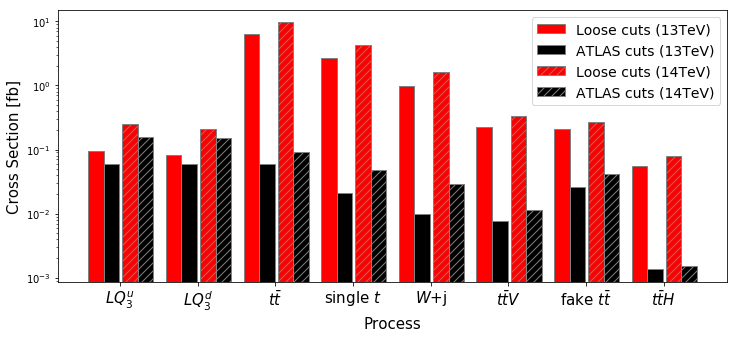

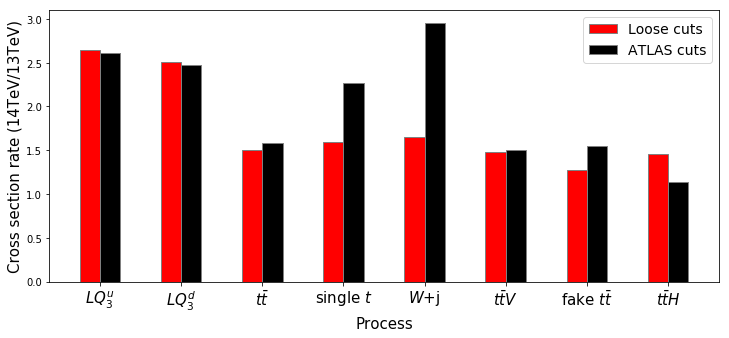

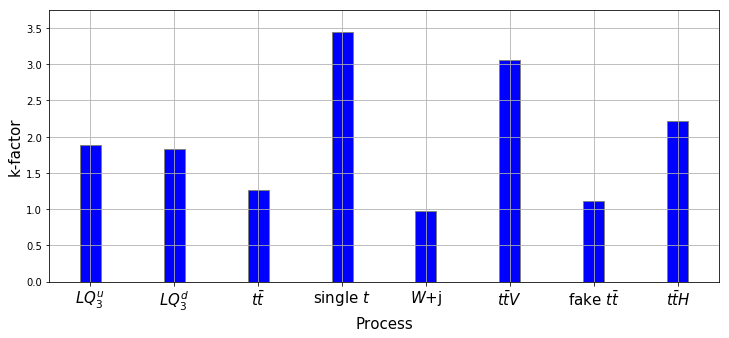

In [7]:
# set width of bar
barWidth = 0.2
 
# Set position of bar on X axis
br0 = np.arange(len(B_exp_loose))
br1 = [x - (barWidth*1.05) for x in br0]
br2 = [x + barWidth for x in br1]
br3 = [x + (barWidth*1.2) for x in br2]
br4 = [x + barWidth for x in br3]


fig = plt.subplots(figsize =(12, 5))

# Make the plot
plt.bar(br1, B_exp_loose_k, color ='r', width = barWidth, edgecolor ='grey', label ='Loose cuts (13TeV)')
plt.bar(br2, B_exp_ATLAS_k, color ='black', width = barWidth, edgecolor ='grey', label ='ATLAS cuts (13TeV)')
plt.bar(br3, B_exp_loose_k_14TeV, color ='r', width = barWidth, edgecolor ='grey', hatch='///', label ='Loose cuts (14TeV)')
plt.bar(br4, B_exp_ATLAS_k_14TeV, color ='black', width = barWidth, edgecolor ='grey', hatch='///', label ='ATLAS cuts (14TeV)')
 
# Adding Xticks
plt.yscale('log')
#plt.ylim([0,150])
plt.ylabel('Cross Section [fb]', fontsize = 15)
plt.xlabel('Process', fontsize = 15)
plt.xticks([r+barWidth/2 for r in range(len(process))], process, fontsize = 15)
#plt.grid()
plt.legend(fontsize=14)
plt.savefig('process_cross_14TeV.pdf', bbox_inches='tight')
plt.show()




# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 5))
 
# Set position of bar on X axis
br1 = np.arange(len(rate_loose))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, rate_loose, color ='r', width = barWidth, edgecolor ='grey', label=r'Loose cuts')
plt.bar(br2, rate_ATLAS, color ='black', width = barWidth, edgecolor ='grey', label=r'ATLAS cuts')
 
# Adding Xticks
#plt.yscale('log')
#plt.ylim([0,3.75])
plt.ylabel('Cross section rate (14TeV/13TeV)', fontsize = 15)
plt.xlabel('Process', fontsize = 15)
plt.xticks([r+barWidth/2 for r in range(len(process))], process, fontsize = 15)
#plt.grid()
plt.legend(fontsize=14)
plt.savefig('process_cross_ratios_14TeV.pdf', bbox_inches='tight')
plt.show()



# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 5))
 
# Set position of bar on X axis
br1 = np.arange(len(k_factor))
 
# Make the plot
plt.bar(br1, k_factor, color ='b', width = barWidth, edgecolor ='grey', label ='k-factors ATLAS cuts')
 
# Adding Xticks
#plt.yscale('log')
plt.ylim([0,3.75])
plt.ylabel('k-factor', fontsize = 15)
plt.xlabel('Process', fontsize = 15)
plt.xticks([r for r in range(len(process))], process, fontsize = 15)
plt.grid()
#plt.legend(fontsize=14)
#plt.savefig('process_kfactors.pdf', bbox_inches='tight')
plt.show()